In [137]:
import pandas as pd
import numpy as np
import glob

import os

import matplotlib.pyplot as plt

In [138]:
data_dir = './data'
data_list = os.listdir(data_dir)
data_list

['분기별 전입(00~21).csv',
 '산업별·규모별(09~19).csv',
 '산업별·규모별2020.csv',
 '시군구별 인구(05~19).csv',
 '시군구별_이동자수_20210630203834.csv',
 '직종별·규모별(09~19).csv',
 '직종별·규모별2020.csv']

In [139]:
df = pd.read_csv(os.path.join(data_dir, data_list[4]), encoding='CP949')
df.head()

,행정구역(시군구)별,2016 1/4,2016 1/4.1,2016 2/4,2016 2/4.1,2016 3/4,2016 3/4.1,2016 4/4,2016 4/4.1,2017 1/4,...,2019 4/4,2019 4/4.1,2020 1/4,2020 1/4.1,2020 2/4,2020 2/4.1,2020 3/4,2020 3/4.1,2020 4/4,2020 4/4.1
0,행정구역(시군구)별,총전입 (명),총전출 (명),총전입 (명),총전출 (명),총전입 (명),총전출 (명),총전입 (명),총전출 (명),총전입 (명),...,총전입 (명),총전출 (명),총전입 (명),총전출 (명),총전입 (명),총전출 (명),총전입 (명),총전출 (명),총전입 (명),총전출 (명)
1,서울특별시,399231,423116,360170,394850,360315,398741,395886,439152,419262,...,368876,382630,466094,462247,367234,380992,367337,391344,377462,408394
2,부산광역시,124094,126800,110210,115073,103584,108993,121127,129541,125908,...,106906,113195,136757,138757,112557,116334,115721,118991,126794,132094
3,대구광역시,87570,90859,75203,78195,80658,81463,84797,86971,87094,...,80952,88109,95334,99097,78355,83308,82917,83626,90642,98052
4,인천광역시,103665,102493,105077,102745,116059,114001,116845,116630,104617,...,103441,104033,114112,118691,108286,114255,109291,114863,112867,112495


In [38]:
data_path = os.path.join(data_dir, data_list[1])
df2 = pd.read_csv(data_path)
df2.head()

,시도별(17개),규모별,산업분류별,2009 1/2,2009 1/2.1,2009 1/2.2,2009 1/2.3,2009 1/2.4,2009 1/2.5,2009 1/2.6,...,2019 1/2.4,2019 1/2.5,2019 1/2.6,2019 2/2,2019 2/2.1,2019 2/2.2,2019 2/2.3,2019 2/2.4,2019 2/2.5,2019 2/2.6
0,시도별(17개),규모별,산업분류별,현원 (명),구인인원 (명),채용인원 (명),미충원인원 (명),부족인원 (명),채용계획인원 (명),부족률 (%),...,부족인원 (명),채용계획인원 (명),부족률 (%),현원 (명),구인인원 (명),채용인원 (명),미충원인원 (명),부족인원 (명),채용계획인원 (명),부족률 (%)
1,전국,전규모(5인이상),전산업(5인이상),8048203,424897,348387,76510,218574,208300,2.6,...,235190,251012,1.9,12018829,672671,598269,74402,241402,255867,2.0
2,서울특별시,전규모(5인이상),전산업(5인이상),2325713,128625,106299,22326,63874,65518,2.7,...,71418,72886,2.2,3268832,196979,171763,25216,73926,75335,2.2
3,부산광역시,전규모(5인이상),전산업(5인이상),522140,24712,21524,3187,12355,12277,2.3,...,9017,9810,1.2,724243,38086,34927,3159,11121,12018,1.5
4,대구광역시,전규모(5인이상),전산업(5인이상),313845,13594,11725,1869,6324,5112,2.0,...,5398,9204,1.2,453555,29737,26931,2806,6737,8840,1.5


In [39]:
df2.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 157 entries, 시도별(17개) to 2019 2/2.6
dtypes: object(157)
memory usage: 23.4+ KB


In [40]:
df2.columns

Index(['시도별(17개)', '규모별', '산업분류별', '2009 1/2', '2009 1/2.1', '2009 1/2.2',
       '2009 1/2.3', '2009 1/2.4', '2009 1/2.5', '2009 1/2.6',
       ...
       '2019 1/2.4', '2019 1/2.5', '2019 1/2.6', '2019 2/2', '2019 2/2.1',
       '2019 2/2.2', '2019 2/2.3', '2019 2/2.4', '2019 2/2.5', '2019 2/2.6'],
      dtype='object', length=157)

In [41]:
drop_columns = list(df2.columns[1:3])
df2 = df2.drop(drop_columns, axis=1)

In [42]:
df2 = df2.fillna(0)

In [43]:
for i in range(2009, 2020):
    a, b, c, d = '{} 1/2.1'.format(i), '{} 1/2.3'.format(i), '{} 2/2.1'.format(i), '{} 2/2.3'.format(i)
    df2['{} 1/2.7'.format(i)] = df2[b][1:].astype('float')/(df2[a][1:].astype('float')+1e-100)*100
    df2['{} 2/2.7'.format(i)] = df2[d][1:].astype('float')/(df2[c][1:].astype('float')+1e-100)*100

In [44]:
df2 = df2.sort_index(axis=1)
df2 = df2.fillna('미충원율 (%)')

In [45]:
df2.head()

,2009 1/2,2009 1/2.1,2009 1/2.2,2009 1/2.3,2009 1/2.4,2009 1/2.5,2009 1/2.6,2009 1/2.7,2009 2/2,2009 2/2.1,...,2019 1/2.7,2019 2/2,2019 2/2.1,2019 2/2.2,2019 2/2.3,2019 2/2.4,2019 2/2.5,2019 2/2.6,2019 2/2.7,시도별(17개)
0,현원 (명),구인인원 (명),채용인원 (명),미충원인원 (명),부족인원 (명),채용계획인원 (명),부족률 (%),미충원율 (%),현원 (명),구인인원 (명),...,미충원율 (%),현원 (명),구인인원 (명),채용인원 (명),미충원인원 (명),부족인원 (명),채용계획인원 (명),부족률 (%),미충원율 (%),시도별(17개)
1,8048203,424897,348387,76510,218574,208300,2.6,18.006717,8128516,465248,...,9.270015,12018829,672671,598269,74402,241402,255867,2.0,11.060682,전국
2,2325713,128625,106299,22326,63874,65518,2.7,17.357434,2334697,141155,...,10.775296,3268832,196979,171763,25216,73926,75335,2.2,12.801365,서울특별시
3,522140,24712,21524,3187,12355,12277,2.3,12.896568,529727,28134,...,5.372356,724243,38086,34927,3159,11121,12018,1.5,8.294386,부산광역시
4,313845,13594,11725,1869,6324,5112,2.0,13.748713,321162,17377,...,6.616066,453555,29737,26931,2806,6737,8840,1.5,9.436056,대구광역시


In [46]:
df2.iloc[:, 1]

0     구인인원 (명)
1       424897
2       128625
3        24712
4        13594
5        20335
6        11060
7        11872
8         7503
9            0
10      101329
11        9488
12       13967
13       13795
14       12779
15        8855
16       19540
17       22648
18        4794
Name: 2009 1/2.1, dtype: object

In [79]:
columns = []
for i in range(2009, 2020):
    columns.append('{} 1/2.7'.format(i))
    columns.append('{} 2/2.7'.format(i))

columns

['2009 1/2.7',
 '2009 2/2.7',
 '2010 1/2.7',
 '2010 2/2.7',
 '2011 1/2.7',
 '2011 2/2.7',
 '2012 1/2.7',
 '2012 2/2.7',
 '2013 1/2.7',
 '2013 2/2.7',
 '2014 1/2.7',
 '2014 2/2.7',
 '2015 1/2.7',
 '2015 2/2.7',
 '2016 1/2.7',
 '2016 2/2.7',
 '2017 1/2.7',
 '2017 2/2.7',
 '2018 1/2.7',
 '2018 2/2.7',
 '2019 1/2.7',
 '2019 2/2.7']

In [80]:
df2.loc[1:, columns]

,2009 1/2.7,2009 2/2.7,2010 1/2.7,2010 2/2.7,2011 1/2.7,2011 2/2.7,2012 1/2.7,2012 2/2.7,2013 1/2.7,2013 2/2.7,...,2015 1/2.7,2015 2/2.7,2016 1/2.7,2016 2/2.7,2017 1/2.7,2017 2/2.7,2018 1/2.7,2018 2/2.7,2019 1/2.7,2019 2/2.7
1,18.006717,17.629092,17.938905,18.449039,19.817588,21.277602,15.160192,16.046194,14.343518,14.048875,...,9.343202,11.966444,11.049333,12.746956,11.012912,11.746965,10.762116,11.16124,9.270015,11.060682
2,17.357434,12.831285,14.45766,14.332052,16.651216,17.084617,12.732329,12.069381,12.370511,10.834248,...,6.884998,10.783104,8.853663,10.182403,8.625136,8.88129,9.43855,10.162527,10.775296,12.801365
3,12.896568,16.656003,13.484919,19.625627,18.308775,19.922032,17.50336,17.276776,15.330396,14.94877,...,12.512754,14.751639,11.813744,14.085449,11.219645,11.87905,12.535399,11.953028,5.372356,8.294386
4,13.748713,15.837026,17.339076,18.99041,18.240302,19.143692,14.625285,18.509846,15.174626,13.687072,...,10.805028,17.933631,8.254255,16.477099,10.416368,10.734979,7.541566,9.765772,6.616066,9.436056
5,21.932628,26.46925,19.79061,17.82304,19.841524,24.307174,13.40807,11.688359,10.929801,13.384594,...,6.134679,8.393973,9.959159,9.883358,7.795276,10.947992,6.8314,8.347451,6.006086,9.220708
6,13.435805,21.250518,13.544141,13.440525,19.850758,14.914043,14.930282,12.483092,10.054945,13.678057,...,7.042816,8.208098,7.949987,9.180395,10.574202,9.879077,8.138476,12.407056,6.02791,8.281798
7,12.179919,15.362351,14.066965,15.11227,16.353172,19.624307,12.851113,10.165961,10.834978,10.109084,...,9.217112,10.742218,8.8403,11.172917,9.844413,13.001532,7.910418,10.323415,7.696736,9.243532
8,21.804611,15.418845,18.468379,22.195491,17.947678,18.456205,13.910896,12.600516,13.905096,18.719638,...,10.854267,12.368568,9.580454,10.560969,9.728858,9.902998,8.541947,5.371954,7.390021,9.003242
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.158238,9.960159,11.526587,8.153204,9.037711,7.838572,7.346797,10.586649
10,19.81565,24.192394,23.856031,19.516778,23.366166,24.15451,14.896048,18.921317,15.383415,15.105603,...,10.81422,12.121446,13.16542,15.743618,13.15878,13.66014,11.46467,11.589268,9.765168,11.025739


In [48]:
df2.loc[2, columns]

2009 1/2.7    17.357434
2009 2/2.7    12.831285
2010 1/2.7     14.45766
2010 2/2.7    14.332052
2011 1/2.7    16.651216
2011 2/2.7    17.084617
2012 1/2.7    12.732329
2012 2/2.7    12.069381
2013 1/2.7    12.370511
2013 2/2.7    10.834248
2014 1/2.7    10.194432
2014 2/2.7    10.525266
2015 1/2.7     6.884998
2015 2/2.7    10.783104
2016 1/2.7     8.853663
2016 2/2.7    10.182403
2017 1/2.7     8.625136
2017 2/2.7      8.88129
2018 1/2.7      9.43855
2018 2/2.7    10.162527
2019 1/2.7    10.775296
2019 2/2.7    12.801365
Name: 2, dtype: object

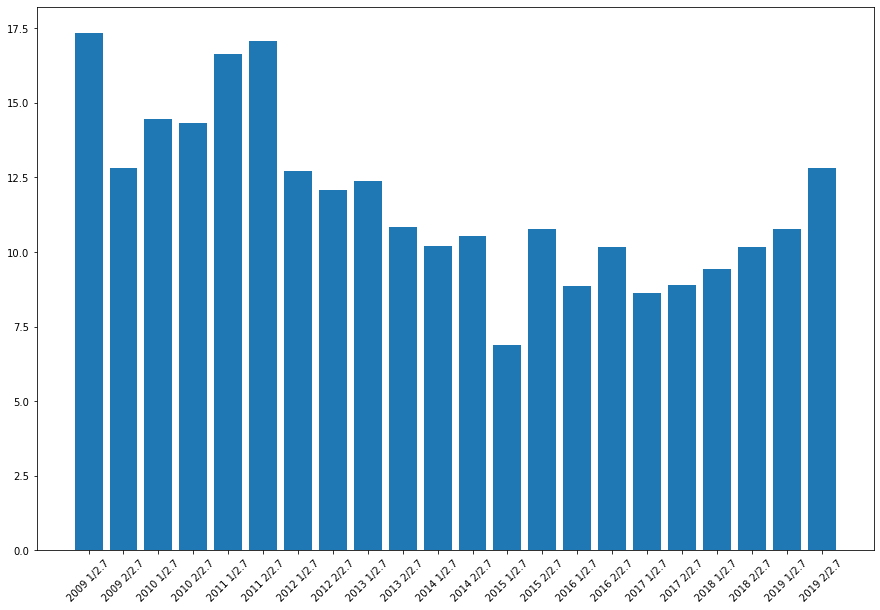

In [93]:
plt.figure(figsize=(15,10))
plt.bar(columns, df2.loc[2, columns].astype('float'))
plt.xticks(rotation = 45)
plt.show()

In [62]:
df3 = pd.read_csv(os.path.join(data_dir, data_list[2]))
df3.head()

,시도별(17개),규모별,산업분류별,2020 1/2,2020 1/2.1,2020 1/2.2,2020 1/2.3,2020 1/2.4,2020 1/2.5,2020 1/2.6,2020 2/2,2020 2/2.1,2020 2/2.2,2020 2/2.3,2020 2/2.4,2020 2/2.5,2020 2/2.6
0,시도별(17개),규모별,산업분류별,현원 (명),구인인원 (명),채용인원 (명),미충원인원 (명),부족인원 (명),채용계획인원 (명),부족률 (%),현원 (명),구인인원 (명),채용인원 (명),미충원인원 (명),부족인원 (명),채용계획인원 (명),부족률 (%)
1,전국,전규모(5인이상),0 전체,12302576,793093,733997,59096,223126,238199,1.8,12320546,621350,556807,64543,238002,253067,1.9
2,서울특별시,전규모(5인이상),0 전체,3312703,223723,205878,17845,61565,63002,1.8,3274711,179381,161988,17393,68147,69394,2.0
3,부산광역시,전규모(5인이상),0 전체,732536,50453,46548,3905,9369,10852,1.3,737522,37741,32696,5045,11501,12142,1.5
4,대구광역시,전규모(5인이상),0 전체,459933,32486,30301,2185,6522,8656,1.4,475763,22562,20739,1823,6228,8102,1.3


In [63]:
df3.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   시도별(17개)    19 non-null     object
 1   규모별         19 non-null     object
 2   산업분류별       19 non-null     object
 3   2020 1/2    19 non-null     object
 4   2020 1/2.1  19 non-null     object
 5   2020 1/2.2  19 non-null     object
 6   2020 1/2.3  19 non-null     object
 7   2020 1/2.4  19 non-null     object
 8   2020 1/2.5  19 non-null     object
 9   2020 1/2.6  19 non-null     object
 10  2020 2/2    19 non-null     object
 11  2020 2/2.1  19 non-null     object
 12  2020 2/2.2  19 non-null     object
 13  2020 2/2.3  19 non-null     object
 14  2020 2/2.4  19 non-null     object
 15  2020 2/2.5  19 non-null     object
 16  2020 2/2.6  19 non-null     object
dtypes: object(17)
memory usage: 2.6+ KB


In [64]:
df3.columns

Index(['시도별(17개)', '규모별', '산업분류별', '2020 1/2', '2020 1/2.1', '2020 1/2.2',
       '2020 1/2.3', '2020 1/2.4', '2020 1/2.5', '2020 1/2.6', '2020 2/2',
       '2020 2/2.1', '2020 2/2.2', '2020 2/2.3', '2020 2/2.4', '2020 2/2.5',
       '2020 2/2.6'],
      dtype='object')

In [65]:
drop_columns = list(df3.columns[0:3])
df3 = df3.drop(drop_columns, axis=1)

In [66]:
df3 = df3. fillna(0)

In [67]:
for i in range(2020,2021):
    a, b, c, d = '{} 1/2.1'.format(i), '{} 1/2.3'.format(i), '{} 2/2.1'.format(i), '{} 2/2.3'.format(i)
    df3['{} 1/2.7'.format(i)] = df3[b][1:].astype('float')/(df3[a][1:].astype('float')+1e-100)*100
    df3['{} 2/2.7'.format(i)] = df3[d][1:].astype('float')/(df3[c][1:].astype('float')+1e-100)*100

In [68]:
df3 = df3.sort_index(axis=1)
df3 = df3.fillna('미충원율 (%)')

In [69]:
df3.head()

,2020 1/2,2020 1/2.1,2020 1/2.2,2020 1/2.3,2020 1/2.4,2020 1/2.5,2020 1/2.6,2020 1/2.7,2020 2/2,2020 2/2.1,2020 2/2.2,2020 2/2.3,2020 2/2.4,2020 2/2.5,2020 2/2.6,2020 2/2.7
0,현원 (명),구인인원 (명),채용인원 (명),미충원인원 (명),부족인원 (명),채용계획인원 (명),부족률 (%),미충원율 (%),현원 (명),구인인원 (명),채용인원 (명),미충원인원 (명),부족인원 (명),채용계획인원 (명),부족률 (%),미충원율 (%)
1,12302576,793093,733997,59096,223126,238199,1.8,7.451333,12320546,621350,556807,64543,238002,253067,1.9,10.387543
2,3312703,223723,205878,17845,61565,63002,1.8,7.976382,3274711,179381,161988,17393,68147,69394,2.0,9.696122
3,732536,50453,46548,3905,9369,10852,1.3,7.739877,737522,37741,32696,5045,11501,12142,1.5,13.367425
4,459933,32486,30301,2185,6522,8656,1.4,6.725974,475763,22562,20739,1823,6228,8102,1.3,8.079957


In [ ]:
df3.append()